### Tutorial of Selenium

In [93]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By

driver = webdriver.Chrome(service=Service("../driver/chromedriver"))
driver.get("https://www.selenium.dev/")
driver.quit()

### 편의를 위해 드라이버 초기화 후 반환하는 함수 선언

In [94]:
def driverInit():
    driver = webdriver.Chrome(service=Service("../driver/chromedriver"))
    driver.set_window_size(1400, 1080)
    driver.get("https://www.selenium.dev/")
    return driver

### URL 받기

In [95]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service

driver = webdriver.Chrome(service=Service("../driver/chromedriver"))
driver.get("https://www.selenium.dev/")

driver.current_url

'https://www.selenium.dev/'

### 스크롤 조작

In [96]:
import time
from bs4 import BeautifulSoup
from urllib.request import Request, urlopen
from user_agent import generate_user_agent

driver = driverInit()
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
time.sleep(1)
driver.execute_script("window.scrollTo(0, 0)")

try:#공백 처리
    print(driver.find_element(By.CLASS_NAME, "d-flex justify-content-center p-5 td-box--100".replace(" ", ".")).text)
except:
    print("Not found")

driver.quit()




News


### innerHTML 출력

In [97]:
from selenium.webdriver.common.by import By

driver = driverInit()
element = driver.find_element(By.CLASS_NAME, "d-flex justify-content-center p-5 td-box--100".replace(" ", "."))
print(element.get_attribute("innerHTML"))
driver.quit()

<h2 class="selenium">News</h2>


### 자식 엘리먼트에서 불러온 Text

In [98]:
from selenium.webdriver.common.by import By

driver = driverInit()
element = driver.find_element(By.CLASS_NAME, "d-flex justify-content-center p-5 td-box--100".replace(" ", "."))
child = element.find_element(By.CLASS_NAME, "selenium")
print(child.text)
driver.quit()


News


### child 엘리먼트를 향해 스크롤

In [99]:
driver = driverInit()
element = driver.find_element(By.CLASS_NAME, "d-flex justify-content-center p-5 td-box--100".replace(" ", "."))
child = element.find_element(By.CLASS_NAME, "selenium")
driver.execute_script("arguments[0].scrollIntoView(false);", child)
time.sleep(1)
driver.quit()

### 스크린샷

In [100]:
driver = driverInit()
driver.save_screenshot("../data/image_01.png")
time.sleep(1)
driver.quit()

출력

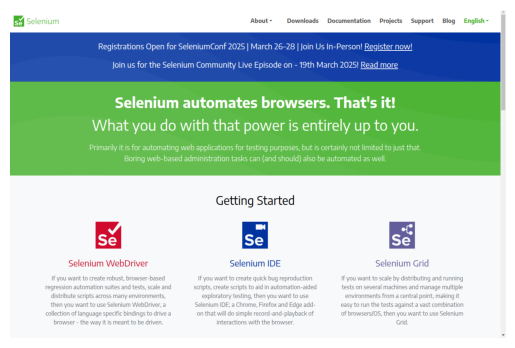

In [101]:
from matplotlib import pyplot as plt
from matplotlib import image as mpimg

image = mpimg.imread("../data/image_01.png")
plt.imshow(image)
plt.axis("off")
plt.show()

In [102]:
driver = driverInit()
time.sleep(1)
doc_link = driver.find_element(By.XPATH, '''//*[@id="main_navbar"]/ul/li[3]/a/span''')
doc_link.click()
time.sleep(1)
driver.quit()

In [103]:
from selenium.webdriver.common.keys import Keys
from selenium.webdriver import ActionChains

driver = driverInit()
doc_link = driver.find_element(By.XPATH, '''//*[@id="main_navbar"]/ul/li[3]/a/span''')
doc_link.click()
search_btn = driver.find_element(By.XPATH, '''//*[@id="docsearch-1"]/button/span[1]/span''')
search_btn.click()
search_doc = driver.find_element(By.CSS_SELECTOR, "#docsearch-input")
search_doc.send_keys('find element')
time.sleep(1)
search_doc.send_keys(Keys.ENTER)
time.sleep(1)
python_tab = driver.find_element(By.ID, "tabs-10-02-tab")
python_tab.click()
python_pannel = driver.find_element(By.ID, "tabs-10-02")
time.sleep(1)
python_code = python_pannel.find_element(By.TAG_NAME, "code")
time.sleep(1)
driver.back()
time.sleep(1)
menu = driver.find_element(By.ID, "main_navbar")
li_list = menu.find_elements(By.TAG_NAME, "li")
'''
for idx, li in enumerate(li_list):
    print(f"[{str(idx)}] ===========================")
    print(li.get_attribute("innerHTML"))
'''
time.sleep(1)
about = li_list[0]
about.click()
link_list = about.find_elements(By.CLASS_NAME, "dropdown-item")
'''
for link in link_list:
    print(link.text)
'''
history = about.find_element(By.LINK_TEXT, "History")

print(history.text)
time.sleep(1)
history.click()
time.sleep(1)
driver.back()
time.sleep(1)

actions = ActionChains(driver)
actions.click(about)
actions.click(history)
actions.perform()


time.sleep(1)


History


In [104]:
driver.back()
about = li_list[0]
link_list = about.find_elements(By.CLASS_NAME, "dropdown-item")
for link in link_list:
    print(link.get_attribute("href"))
driver.quit()

https://www.selenium.dev/about
https://www.selenium.dev/project
https://www.selenium.dev/events
https://www.selenium.dev/ecosystem
https://www.selenium.dev/history
https://www.selenium.dev/getinvolved
https://www.selenium.dev/sponsors
https://www.selenium.dev/sponsor
